<h2 style="font-weight:700;">ЛАБОРАТОРНАЯ РАБОТА №5</h2>

<p style="font-weight:600;">РЕШЕНИЕ ЗАДАЧИ КЛАСТЕРИЗАЦИИ</p>

<p style="font-weight:600">Цели и задачи работы</p>

<p><span style="font-weight:600;">Цель лабораторной работы:</span> научиться производить кластерный анализ данных с
использованием метода К-средних.<p>
<span style="font-weight:600;">Основные задачи:</span>
<ul>
<li>изучение инструментария Python для реализации алгоритмов кластерного
анализа;</li>
<li>изучение принципов определения оптимального количества кластеров в
методах кластерного анализа;</li>
<li>освоение метода К-средних;</li>
<li>изучение методов визуализации модели и оценки ее корректности.</li></ul>

<p>В своему работе я использую датасет – wholesale.csv (Данные оптовых клиентов). Набор данных содержит информацию о клиентах оптового дистрибьютора. Он
включает годовые расходы в денежных единицах на различные категории продуктов.</p>

<p style="font-weght:600;">Атрибуты:</p>
<ul>
<li>Fresh – годовые расходы (ден.е.) на свежие продукты (непрерывно);</li>
<li>Milk – годовые расходы (ден.е.) на молочные продукты (непрерывно);</li>
<li>Grocery – годовые расходы (ден.е.) на бакалейные товары (непрерывно);</li>
<li>Frozen – годовые расходы (ден.е.) на замороженные продукты (непрерывно)</li>
<li>Detergents_paper – годовые расходы (ден.е.) на моющие средства и бумажные
изделия (непрерывно)</li>
<li>Delicatessen – годовые расходы (ден.е.) на деликатесы и продукты (непре-
рывно);</li>
<li>Channel – канал сбыта клиентов – Horeca (гостиница/ресторан/кафе) или роз-
ничный канал (номинально)</li>
<li>Region – регион сбыта клиентов – Лиснон, Порту или другой (номинально)</li>
</ul>

<h2>Импортируем библиотеки и загружаем данные</h2>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("wholesale.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<h2></h2>

<h2>Получим информацию о датасете</h2>

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<h2>Проверяем данные на наличие пропущенных значений и выбросов</h2>

In [3]:

# проверяем на пропущенные значения
print(df.isnull().sum())
     

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


<h2>Исключаем невлияющие категориальные признаки</h2>

In [6]:

df_copy = df.copy()
# исключаем категориальные признаки
df_copy.drop(['Channel', 'Region'], axis=1, inplace=True)
df_copy.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<h2>Масштабирование признаков (StandardScaler)</h2>

In [7]:
from sklearn.preprocessing import StandardScaler

# создаём объект StandardScaler
scaler = StandardScaler()

# приводим данные к единому масштабу
X = scaler.fit_transform(df_copy)

# проверим первые 4 строки
print(X[:4, :])


[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]]


<h2>Определяем оптимальное количество кластеров (метод локтя)</h2>

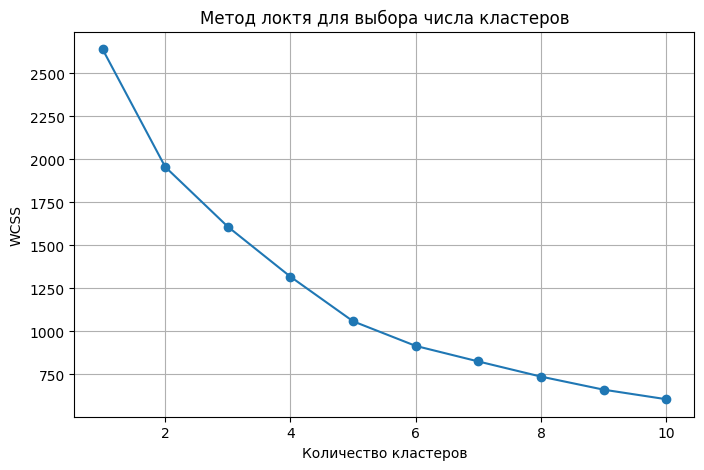

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# wcss — сумма квадратов расстояний до центров кластеров
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, 
        init='k-means++', 
        max_iter=300, 
        n_init=10, 
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# визуализируем метод локтя
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для выбора числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


<h2>Обучаем модель кластеризации</h2>

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# обучаем модель на стандартизированных данных
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


<h2>
Предсказываем кластеры и визуализируем результаты</h2>

In [10]:
clusters = kmeans.predict(X)

# добавляем метки кластеров в исходный датафрейм
df_copy['cluster'] = clusters

# выводим первые 5 строк
df_copy.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,1


<h2>Визуализация результатов кластеризации с помощью PCA</h2>

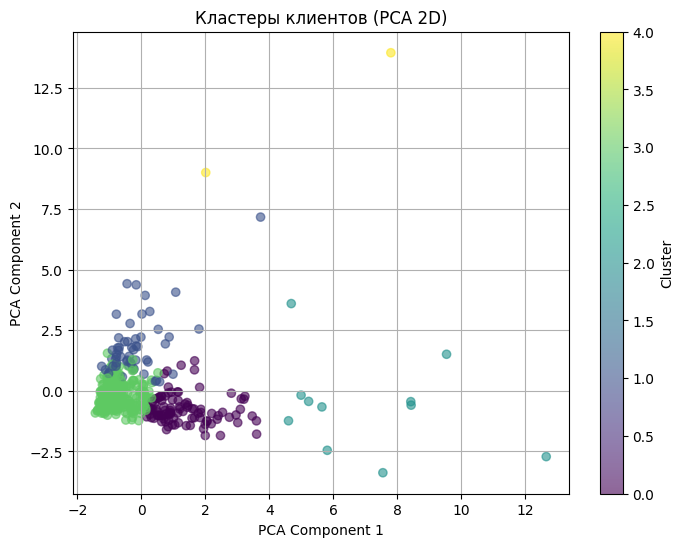

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализируем кластеры на 2D графике
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Кластеры клиентов (PCA 2D)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_groups = df_copy.groupby('cluster')

# Анализ средних значений в каждом кластере
cluster_groups.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667
1,34188.627119,4850.576271,5870.000000,7215.559322,955.847458,2491.796610
2,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
3,9112.235294,2965.404412,3783.702206,2413.591912,976.908088,974.926471
4,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


<h2>Визуализация по парам признаков с центроидами</h2>

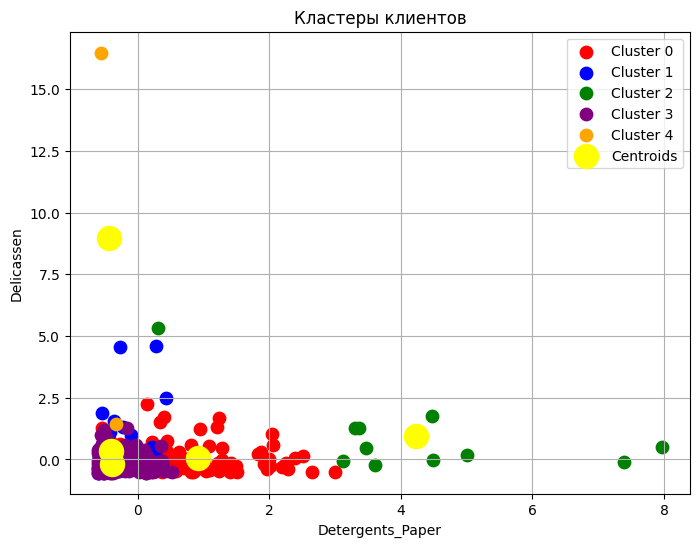

In [15]:
import matplotlib.pyplot as plt

# Визуализация кластеров по двум парам признаков с центроидами
# Пример 1: Detergents_Paper (4) и Delicassen (5)
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,4], X[clusters == 0,5], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,4], X[clusters == 1,5], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,4], X[clusters == 2,5], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,4], X[clusters == 3,5], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,4], X[clusters == 4,5], s = 80, c = 'orange', label = 'Cluster 4')

# Центроиды
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.legend()
plt.grid(True)
plt.show()

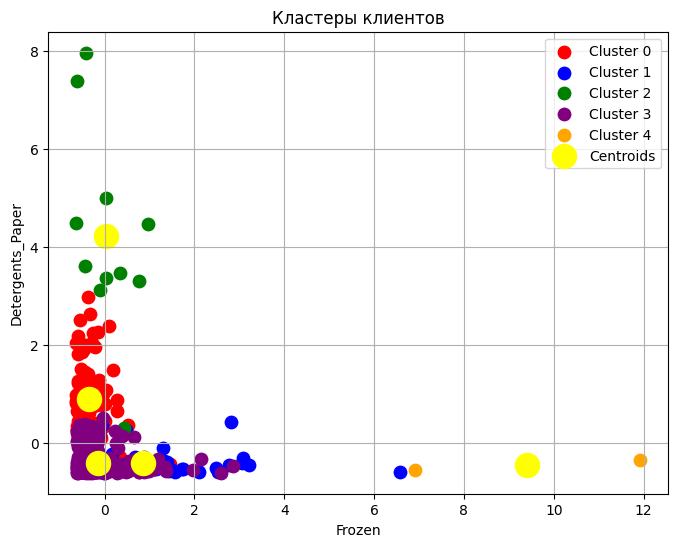

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,3], X[clusters == 0,4], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,3], X[clusters == 1,4], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,3], X[clusters == 2,4], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,3], X[clusters == 3,4], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,3], X[clusters == 4,4], s = 80, c = 'orange', label = 'Cluster 4')

# Центроиды
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Добавляем идентификатор клиента (или индекс) в исходные данные
df_copy['CustomerID'] = df_copy.index
df_copy.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,CustomerID
0,12669,9656,7561,214,2674,1338,3,0
1,7057,9810,9568,1762,3293,1776,0,1
2,6353,8808,7684,2405,3516,7844,0,2
3,13265,1196,4221,6404,507,1788,3,3
4,22615,5410,7198,3915,1777,5185,1,4


In [18]:
for cluster_num in range(5):
    print(f"\nCluster {cluster_num} customers:")
    print(df_copy[df_copy['cluster'] == cluster_num]['CustomerID'].values)


Cluster 0 customers:
[  1   2   9  10  13  14  16  24  28  35  37  38  42  43  44  45  46  48
  49  53  57  63  67  77  81  82  94 100 101 106 107 109 111 145 155 156
 158 159 160 163 165 166 170 171 173 175 182 188 189 193 197 200 201 205
 209 214 215 216 218 221 244 245 254 264 265 266 268 293 301 302 303 304
 305 306 309 312 315 319 331 340 341 343 346 349 351 353 357 376 384 396
 407 416 418 420 426 437]

Cluster 1 customers:
[  4  12  22  29  33  36  39  40  52  54  70  71  73  87  89  93 103 112
 124 125 129 141 142 149 176 181 196 202 239 240 253 255 258 259 273 276
 282 283 284 285 289 311 334 335 347 370 371 377 380 381 382 393 401 406
 413 425 427 435 436]

Cluster 2 customers:
[ 23  47  56  61  65  85  86  92 211 251 333]

Cluster 3 customers:
[  0   3   5   6   7   8  11  15  17  18  19  20  21  25  26  27  30  31
  32  34  41  50  51  55  58  59  60  62  64  66  68  69  72  74  75  76
  78  79  80  83  84  88  90  91  95  96  97  98  99 102 104 105 108 110
 113 114 115 11